# Task 1

---
## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests # for webscraping
from bs4 import BeautifulSoup #for webscraping
import pandas as pd # data analysis and manipulation
import numpy as np # for dealing with arrays


In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

In [ ]:
df.to_csv("C:\\Users\\cc\\OneDrive - University of Essex\\Documents\\BA_internship\\Task1\\BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.
 
 

In [3]:
data = pd.read_csv("C:\\Users\\cc\\OneDrive - University of Essex\\Documents\\BA_internship\\Task1\\BA_reviews.csv")
data.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Overall very satisfied. Gro...
1,1,✅ Trip Verified | As always when I fly BA it ...
2,2,✅ Trip Verified | First time using BA busines...
3,3,Not Verified | Extremely rude ground service....
4,4,✅ Trip Verified | My son and I flew to Geneva...


In [4]:
data.reviews = data.reviews.str.split('|',expand = True)[1]

### DATA PROCESSING STEPS

Cleaning text Tokenization Enrichment - POS tagging Removing stop words and obtaining stem words

In [5]:
data.head()

,Unnamed: 0,reviews
0,0,Overall very satisfied. Ground staff member ...
1,1,As always when I fly BA it was a total shamb...
2,2,First time using BA business class but we we...
3,3,Extremely rude ground service. We were non-r...
4,4,My son and I flew to Geneva last Sunday for ...


Count the number of words that appear the most

In [6]:
import re
def clean(text):
    text = re.sub('[^A-Za-z]+',' ',str(text))
    return text

data['clean reviews']=data['reviews'].apply(clean)
data.head()

,Unnamed: 0,reviews,clean reviews
0,0,Overall very satisfied. Ground staff member ...,Overall very satisfied Ground staff member at...
1,1,As always when I fly BA it was a total shamb...,As always when I fly BA it was a total shambl...
2,2,First time using BA business class but we we...,First time using BA business class but we wer...
3,3,Extremely rude ground service. We were non-r...,Extremely rude ground service We were non rev...
4,4,My son and I flew to Geneva last Sunday for ...,My son and I flew to Geneva last Sunday for a...


In [7]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

from nltk import pos_tag

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS Tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    new_list = []
    for word,tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            new_list.append(tuple([word, pos_dict.get(tag[0])]))
    return new_list

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\cc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\cc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [9]:
data['POS tagged']=data['clean reviews'].apply(token_stop_pos)

In [10]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

In [11]:
data['lemma'] =  data['POS tagged'].apply(lemmatize)
data.head()

,Unnamed: 0,reviews,clean reviews,POS tagged,lemma
0,0,Overall very satisfied. Ground staff member ...,Overall very satisfied Ground staff member at...,"[(Overall, a), (satisfied, a), (Ground, n), (s...",Overall satisfied Ground staff member YVR ex...
1,1,As always when I fly BA it was a total shamb...,As always when I fly BA it was a total shambl...,"[(always, r), (fly, v), (BA, None), (total, a)...",always fly BA total shamble book Manchester ...
2,2,First time using BA business class but we we...,First time using BA business class but we wer...,"[(First, a), (time, n), (using, v), (BA, n), (...",First time use BA business class pleased ser...
3,3,Extremely rude ground service. We were non-r...,Extremely rude ground service We were non rev...,"[(Extremely, r), (rude, a), (ground, n), (serv...",Extremely rude ground service non rev fly Lo...
4,4,My son and I flew to Geneva last Sunday for ...,My son and I flew to Geneva last Sunday for a...,"[(son, n), (flew, v), (Geneva, n), (last, a), ...",son fly Geneva last Sunday skiing holiday Le...


In [12]:
data[['reviews','lemma']]

,reviews,lemma
0,Overall very satisfied. Ground staff member ...,Overall satisfied Ground staff member YVR ex...
1,As always when I fly BA it was a total shamb...,always fly BA total shamble book Manchester ...
2,First time using BA business class but we we...,First time use BA business class pleased ser...
3,Extremely rude ground service. We were non-r...,Extremely rude ground service non rev fly Lo...
4,My son and I flew to Geneva last Sunday for ...,son fly Geneva last Sunday skiing holiday Le...
...,...,...
995,My husband and I flew on British Airways fli...,husband fly British Airways flight BA Baltim...
996,Bridgetown to Gatwick. I couldn't imagine th...,Bridgetown Gatwick imagine first class BA wo...
997,London to Athens. Classic BA love and hate r...,London Athens Classic BA love hate relations...
998,I booked a British Airways flight from Amste...,book British Airways flight Amsterdam London...


In [ ]:
%pip install vaderSentiment

In [13]:
from  vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vader_sentiment_analysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [14]:
data['Sentiment'] = data['lemma'].apply(vader_sentiment_analysis)
data['Analysis'] = data['Sentiment'].apply(vader_analysis)
data.head()

,Unnamed: 0,reviews,clean reviews,POS tagged,lemma,Sentiment,Analysis
0,0,Overall very satisfied. Ground staff member ...,Overall very satisfied Ground staff member at...,"[(Overall, a), (satisfied, a), (Ground, n), (s...",Overall satisfied Ground staff member YVR ex...,0.9296,Positive
1,1,As always when I fly BA it was a total shamb...,As always when I fly BA it was a total shambl...,"[(always, r), (fly, v), (BA, None), (total, a)...",always fly BA total shamble book Manchester ...,-0.8281,Negative
2,2,First time using BA business class but we we...,First time using BA business class but we wer...,"[(First, a), (time, n), (using, v), (BA, n), (...",First time use BA business class pleased ser...,0.9313,Positive
3,3,Extremely rude ground service. We were non-r...,Extremely rude ground service We were non rev...,"[(Extremely, r), (rude, a), (ground, n), (serv...",Extremely rude ground service non rev fly Lo...,0.6829,Positive
4,4,My son and I flew to Geneva last Sunday for ...,My son and I flew to Geneva last Sunday for a...,"[(son, n), (flew, v), (Geneva, n), (last, a), ...",son fly Geneva last Sunday skiing holiday Le...,-0.8506,Negative


In [15]:
vader_count = data['Analysis'].value_counts()
vader_count

Positive    480
Negative    413
Neutral     107
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x21b66dfe6c8>,
 [Text(0.0690696084852792, 1.0978293989430645, 'Positive'),
  Text(-0.42732892910126147, -1.0136024794529506, 'Negative'),
  Text(1.2744424129677328, -0.4453049921446907, 'Neutral')],
 [Text(0.03767433190106138, 0.598816035787126, '48.0%'),
  Text(-0.2330885067825062, -0.5528740797016094, '41.3%'),
  Text(0.802426704461165, -0.2803772172762867, '10.7%')])

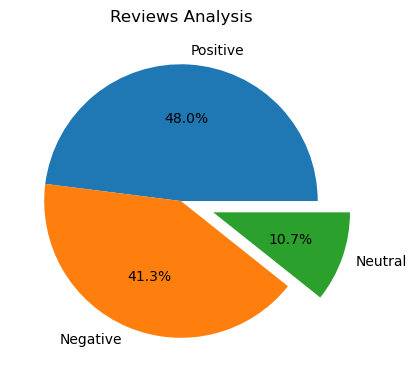

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_count.values, labels = vader_count.index, explode=(0,0,0.25),autopct='%1.1f%%', shadow=False)

In [19]:
%pip install plotly

     ---------------------------------------- 15.6/15.6 MB 4.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [20]:
#%pip install waterfallcharts
#%pip install waterfall-ax
import waterfall_chart
from waterfall_ax import WaterfallChart
import plotly.graph_objects as go

In [21]:
%pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color = "white",
        stopwords = stopwords,
        max_words = 100,
        max_font_size = 30,
        scale = 3,
        random_state = 1
    )
    
    wordcloud = wordcloud.generate(str(data))
    
    fig= plt.figure(1, figsize=(12,12))
    plt.axis('off')
    
    plt.imshow(wordcloud)
    plt.show()

     -------------------------------------- 300.2/300.2 kB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


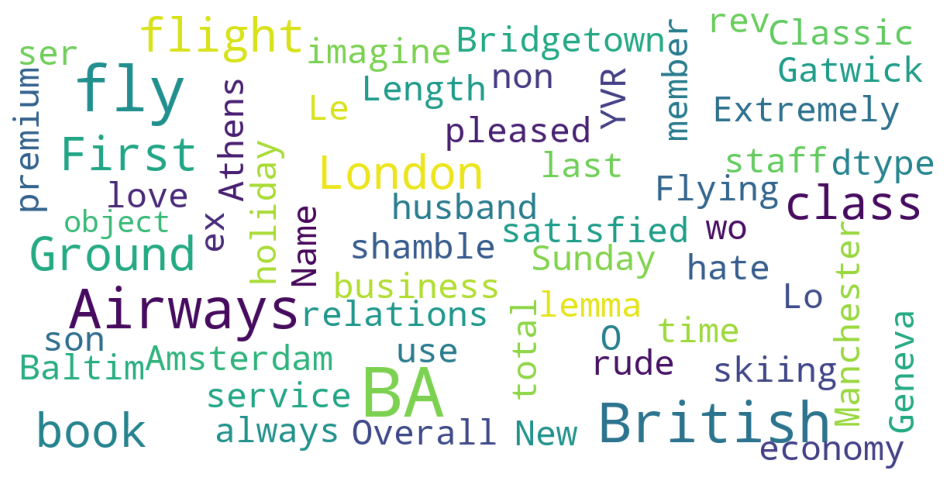

In [22]:
show_wordcloud(data.lemma)